# Exercise No. 17
## Credit Card Data Clustering
#### 2019 June 25 | Cameron.Cn
Data from | https://www.kaggle.com/arjunbhasin2013/ccdata/

In [1]:
# bringing in our libraries
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

%matplotlib inline

In [60]:
# finding our file
location = "../AdvData_DATASETS/CC_GENERAL.csv"
cred = pd.read_csv(location) # reading the file
cred.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [61]:
print(cred.count())
print('---------')

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64
---------


In [62]:
cred.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

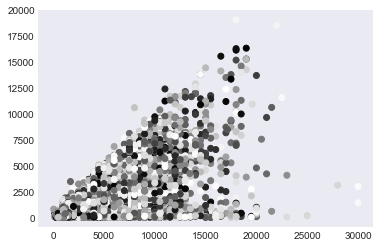

In [90]:
# plotting the Balance on a card (Y) by the credit limit (X)
rng = np.random.RandomState(91)
colors = rng.rand(8950)
plt.scatter(cred['CREDIT_LIMIT'],cred['BALANCE'], c=colors)

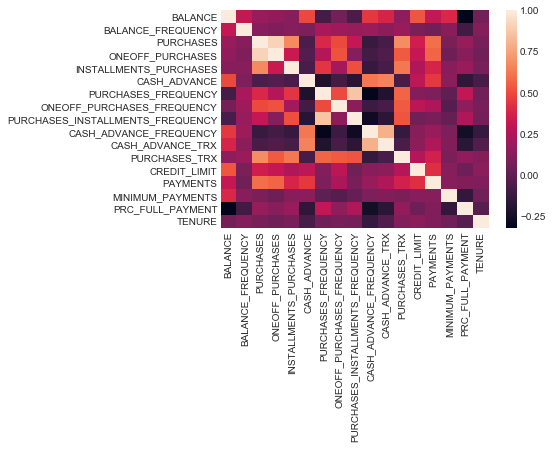

In [65]:
# simple heatmap for corr (more interesting visually than a corr table)
plt.style.use('seaborn-dark')
sns.heatmap(cred.corr())

In [66]:
# theres one spot missing! how? 
cred.loc[cred['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [67]:
cred['CREDIT_LIMIT'].fillna('1000', inplace=True)

In [68]:
print(cred.isnull().sum())
print('------')
print(cred.mean())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
------
BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE        

In [69]:
# filling the MIN_PAY with the average of groups (by Tenure)
cred['MINIMUM_PAYMENTS'].fillna(cred.groupby(['TENURE'])['MINIMUM_PAYMENTS'].transform('mean'), 
                            inplace=True)

In [70]:
print(cred.isnull().sum())
print('------')
print(cred.mean())
print(cred.dtypes)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
------
BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASE

In [85]:
#cred['CREDIT_LIMIT'] = cred['CREDIT_LIMIT'].astype(str).astype(int)
#cred.dtypes

---
### Potential Pairings for K-Means (Now That the Data is Cleaned)

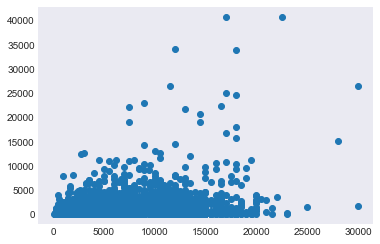

In [11]:

plt.scatter(cred['CREDIT_LIMIT'],cred['ONEOFF_PURCHASES'])

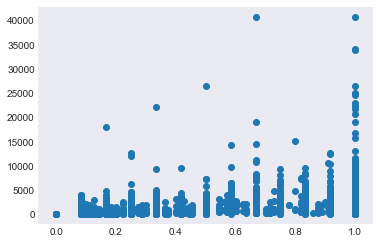

In [13]:

plt.scatter(cred['ONEOFF_PURCHASES_FREQUENCY'],cred['ONEOFF_PURCHASES'])

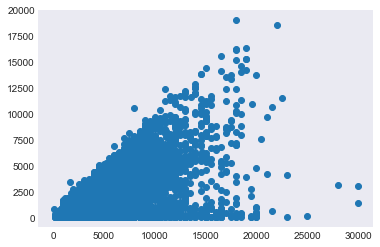

In [15]:
plt.scatter(cred['CREDIT_LIMIT'],cred['BALANCE'])

---
### K-Mean for CreditLimit and Balance

In [75]:
credK = cred.drop(['CUST_ID'],axis=1)
credK.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,913.155148,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791237,0.000000,12


In [76]:
#credK = credK[credK['CREDIT_LIMIT'] < 5000]
#credK.head()

In [77]:
X = credK.drop('BALANCE', axis=1)
X.head()

,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000,201.802084,139.509787,0.000000,12
1,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000,4103.032597,1072.340217,0.222222,12
2,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500,622.066742,627.284787,0.000000,12
3,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500,0.000000,913.155148,0.000000,12
4,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200,678.334763,244.791237,0.000000,12


In [78]:
Y = credK['BALANCE'].copy()
Y.head()

0      40.900749
1    3202.467416
2    2495.148862
3    1666.670542
4     817.714335
Name: BALANCE, dtype: float64

In [82]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[8.56875508e-01 5.77889084e+02 2.97074968e+02 2.81123332e+02
  5.21109963e+02 4.60601604e-01 1.47000138e-01 3.48656110e-01
  1.11933322e-01 2.36353539e+00 1.04087591e+01 2.59369550e+03
  9.76550096e+02 6.43627363e+02 1.48306186e-01 1.14154237e+01]
 [9.03803794e-01 1.03175615e+04 7.28508875e+03 3.03263449e+03
  5.43558538e+03 7.27762912e-01 5.75536375e-01 5.84210294e-01
  2.31251574e-01 9.23529412e+00 8.25882353e+01 1.24415441e+04
  1.79460682e+04 2.43399283e+03 3.26650662e-01 1.18455882e+01]
 [9.27000887e-01 1.56593865e+03 9.71089152e+02 5.95134510e+02
  1.88599596e+03 5.52129914e-01 3.21388715e-01 3.92130096e-01
  1.88171411e-01 5.14570064e+00 2.18252389e+01 8.83133324e+03
  2.75348467e+03 1.32609486e+03 1.57920395e-01 1.17551752e+01]]


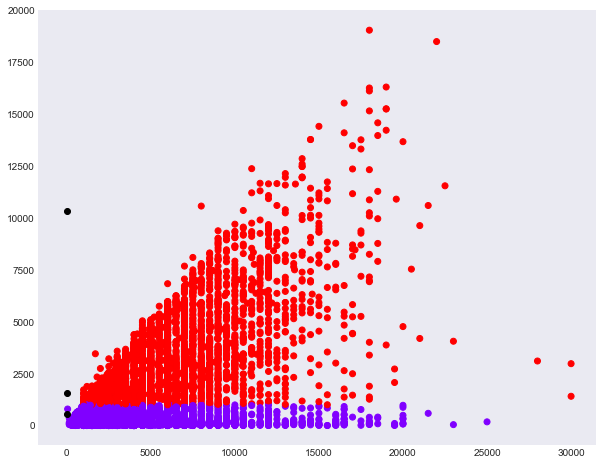

In [83]:
plt.figure(figsize=(10,8))
plt.scatter(credK['CREDIT_LIMIT'],credK['BALANCE'], c=credK['BALANCE'] > 1000, 
            cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
#plt.savefig("credit-scatter.png")